# Sigmoidal Signal Response

#### Author(s):  Stanley Wang
#### Reference: [Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/sigmoidal-signal-response.cpi)

This is the CPi representation of the 3rd model from the Tyson et al (2003) paper. This system is a modification of the "Phosphorylation and Dephosphorylation" model.

This model presented by Tyson et al. (2003) looks identical to the biochemical system in Figure 3.3 on the surface of the circuit diagram, however, this time both [phosphorylation and dephosphorylation](https://cpi-catalog.000webhostapp.com/index.php?model=69) reactions are governed by Michaelis-Menten kinetics.

The system is called a "buzzer" by Tyson et al. The reason for this name lies in the behaviour of the system. Observe in the plot that for certain levels of signal strength the steady-state response R rises very steeply. The signal S must be strong enough in order to create a noticeable change in the state of equilibrium of the system. In line with the analogy, one must press hard enough on the buzzer to activate a sudden change in response. The sigmoidal pattern shows that the response is continuous and reversible - as soon as less signal is applied to the system the response will exhibit the same abrupt change in the opposite direction.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('sigmoidal-signal-response')

Select the model: sigmoidal-signal-response
The processes in this cpi model are:
Pi


## Code

In [4]:
ode_def = cpi_model.view_processdef('Pi')

The cpi definitions of selected file are:

-- Sigmoidal Signal Response by Stanley Wang



species R(a,b) = a(x,y).(x.R(a,b) + y.RP(a,b));

species S(c) = { e - r@0.01,e - s@100 } c < r,s > .e.S(c);

species RP(a,b) = b(v,w).(v.RP(a,b) + w.R(a,b));

species A(d) = { f - t@0.01,f - u@100 } d < t,u > .f.A(d);

process Pi = [1.0] R(a,b) || [0.01] S(c) || [0.0] RP(a,b) || [0.01] A(d)

: { a - c@2000.2, b - d@2000.2 } ;


## Plot

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


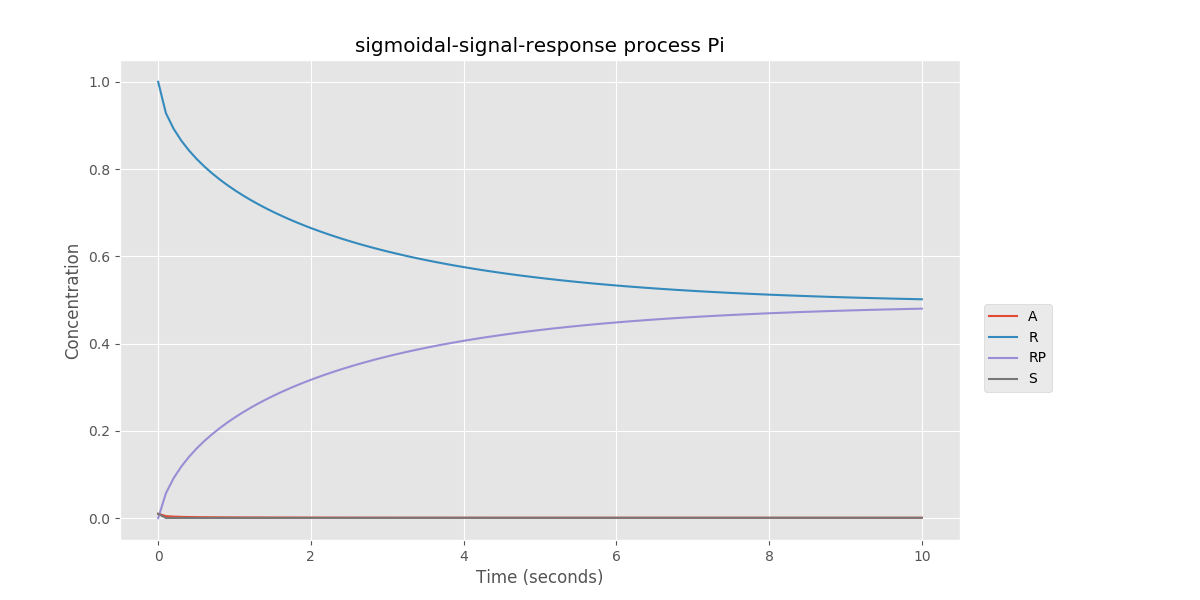

In [5]:
solution = cpi_model.simulate_process('Pi','odeint', 0, 10, 100)
solution.show_plot()